<a href="https://colab.research.google.com/github/sunshine01910/eco.cva/blob/main/Taller_3_2022_10_28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Integrantes: Maria Estefania Silva Leal, Juliette Alexandra Garavito Tique y 
Sara Lucia Pulido Reina

# Taller: efecto de haber visto ballenas en la probabilidad de pagar por conservar

El siguiente taller es opcional. Usted puede decidir hacerlo o no, no tendrá efecto en su nota si no lo hace, pero si decide hacerlo y lo entrega, tendrá un valor del 5% sobre la nota del parcial final.

El dataset a analizar y con el cual se va a modelar contiene las siguientes variables:

`Country`: país de origen

`SeeWhales`: vio o no ballenas

`Age`: edad

`Gender`: género

`Education`: nivel educativo

`Income_AUD`: ingreso categorizado

`Income`: ingreso en dólares australianos

`AdultWhales`: número de ballenas adultas vistas

`YoungWhales`: vio o no ballenas jóvenes

`Max_wtp`: Máxima disposición a pagar

`wtp`: qué tan dispuesto está a pagar por la conservación de las ballenas

`PayConserve`: disposición a pagar o no 2 dólares cada semana durante 10 años por conservar el espacio para avistar ballenas 

El objetivo es responder a la pregunta ¿cuál es el efecto de haber visto ballenas (adultas o jóvenes) en la probabilidad de pagar por conservar 2 dólares cada semana durante 10 años?

Para resolver el ejercicio, siga la estructura del taller anterior. Tenga presente que muchas de estas variables son categóricas, será necesario hacer la transformación correspondiente.

Además de las variables indicadas, utilice al menos tres adicionales para estimar el modelo.

#Importación de librerías y datos
importe las librerías que considere necesarias para manipular datos

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
df = pd.read_csv('datos_whales.csv')

#Exploración inicial

In [ ]:
df.head(10)

,Country,SeeWhales,Age,Gender,Education,Income_AUD,Income,AdultWhales,YoungWhales,Max_wtp,wtp,PayConserve
0,Australia,1,31.0,Female,Diploma,"$60,001 - $70,000",65000.5,2,Yes,0.0,Less,1
1,UK,0,22.0,Female,Degree,"Less than $20,000",10000.0,6,No,0.0,More,0
2,USA,0,46.0,Female,Degree,"More than $70,000",85000.5,7,No,0.0,More,0
3,France,0,37.0,Female,Diploma,"$20,001 - $30,000",25000.5,4,Yes,0.0,More,1
4,UK,0,66.0,Female,Degree,NaN,NaN,6,No,0.0,More,0
5,Australia,0,65.0,Male,Post-graduate degree,"$40,001 - $50,000",45000.5,3,Yes,1.0,Same,1
6,Australia,0,49.0,Male,Post-graduate degree,"$20,001 - $30,000",25000.5,2,No,2.0,Less,1
7,UK,0,38.0,Female,Post-graduate degree,"More than $70,000",85000.5,0,Yes,0.0,More,0
8,Australia,0,54.0,Male,Completed year 12,"More than $70,000",85000.5,6,Yes,5.0,Same,1
9,Australia,0,59.0,Female,Completed year 10,"Less than $20,000",10000.0,4,No,0.0,More,0


Conclusiones: En estos 10 primeros datos el mayor número de ballenas vistas adultas fue de 7, correspondiente a un estadounidense, todos son mayores de edad, 5 personas están dispuestas a pagar 2 dólares cada semana durante 10 años por conservar el ecosistema.

In [ ]:
df.tail(10)

,Country,SeeWhales,Age,Gender,Education,Income_AUD,Income,AdultWhales,YoungWhales,Max_wtp,wtp,PayConserve
691,Italy,0,58.0,Female,Diploma,NaN,NaN,8,Yes,0.0,Less,1
692,Australia,0,53.0,Female,Post-graduate degree,"More than $70,000",85000.5,4,Yes,0.0,Less,1
693,Australia,0,34.0,Female,Completed year 10,"$50,001 - $60,000",55000.5,4,Yes,5.0,Less,1
694,The Netherlands,0,31.0,Female,Degree,"$50,001 - $60,000",55000.5,4,No,0.0,More,1
695,Australia,0,40.0,Female,Completed year 12,"$50,001 - $60,000",55000.5,15,No,10.0,Same,1
696,Australia,0,56.0,Female,Completed year 10,"Less than $20,000",10000.0,0,Yes,1.0,Same,1
697,Australia,0,38.0,Female,Completed year 10,"$30,001 - $40,000",35000.5,6,Yes,2.0,Same,1
698,Australia,0,24.0,Female,Diploma,"$20,001 - $30,000",25000.5,6,No,2.0,Less,1
699,Australia,0,50.0,Male,Post-graduate degree,"$30,001 - $40,000",35000.5,2,Yes,5.0,Same,1
700,Australia,0,32.0,Male,Degree,"More than $70,000",85000.5,8,Yes,0.0,Same,0


Conclusiones: En estos 10 últimos datos el mayor número de ballenas vistas adultas fue de 15, correspondiente a un australiano, todos son mayores de edad, 9 personas estan dispuestas a pagar 2 dólares cada semana durante 10 años por conservar el ecosistema.


In [ ]:
len(df.columns)

12

In [ ]:
print("Number of Rows", len(df))

Number of Rows 701


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      701 non-null    object 
 1   SeeWhales    701 non-null    int64  
 2   Age          691 non-null    float64
 3   Gender       701 non-null    object 
 4   Education    701 non-null    object 
 5   Income_AUD   674 non-null    object 
 6   Income       674 non-null    float64
 7   AdultWhales  701 non-null    int64  
 8   YoungWhales  701 non-null    object 
 9   Max_wtp      701 non-null    float64
 10  wtp          701 non-null    object 
 11  PayConserve  701 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 65.8+ KB


Conclusiones: 6 datos son objetos, 3 datos son enteros y 4 datos que tienen números con decimales.

In [ ]:
df.describe()

,SeeWhales,Age,Income,AdultWhales,Max_wtp,PayConserve
count,701.000000,691.000000,674.000000,701.000000,701.000000,701.000000
mean,0.126961,42.918958,44540.456973,6.058488,3.149786,0.660485
std,0.333168,15.562472,26362.209685,3.779758,18.043962,0.473883
min,0.000000,13.000000,10000.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,25000.500000,4.000000,0.000000,0.000000
50%,0.000000,41.000000,35000.500000,6.000000,0.000000,1.000000
75%,0.000000,54.500000,65000.500000,8.000000,2.000000,1.000000
max,1.000000,82.000000,85000.500000,30.000000,250.000000,1.000000


* Al observar la variable *PayConserve*, se evidencia que la media es un valor pequeño, lo que indica que en esta variable la mayoría de las respuestas fueron cercanas a 0, es decir que pocas personas estarian dispuestas a pagar  2 dolares cada semana durante 10 años por conservar el ecosistema.
* *SeeWhales*, *AdultWhales*, *Max_wtp* y *PayConserve* tienen la misma cantidad de datos, correspondientes al mismo número de filas.


# Limpieza de datos

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates()

,Country,SeeWhales,Age,Gender,Education,Income_AUD,Income,AdultWhales,YoungWhales,Max_wtp,wtp,PayConserve
0,Australia,1,31.0,Female,Diploma,"$60,001 - $70,000",65000.5,2,Yes,0.0,Less,1
1,UK,0,22.0,Female,Degree,"Less than $20,000",10000.0,6,No,0.0,More,0
2,USA,0,46.0,Female,Degree,"More than $70,000",85000.5,7,No,0.0,More,0
3,France,0,37.0,Female,Diploma,"$20,001 - $30,000",25000.5,4,Yes,0.0,More,1
4,UK,0,66.0,Female,Degree,NaN,NaN,6,No,0.0,More,0
...,...,...,...,...,...,...,...,...,...,...,...,...
696,Australia,0,56.0,Female,Completed year 10,"Less than $20,000",10000.0,0,Yes,1.0,Same,1
697,Australia,0,38.0,Female,Completed year 10,"$30,001 - $40,000",35000.5,6,Yes,2.0,Same,1
698,Australia,0,24.0,Female,Diploma,"$20,001 - $30,000",25000.5,6,No,2.0,Less,1
699,Australia,0,50.0,Male,Post-graduate degree,"$30,001 - $40,000",35000.5,2,Yes,5.0,Same,1


In [ ]:
df.isna().sum()

Country         0
SeeWhales       0
Age            10
Gender          0
Education       0
Income_AUD     27
Income         27
AdultWhales     0
YoungWhales     0
Max_wtp         0
wtp             0
PayConserve     0
dtype: int64

In [ ]:
df.isna().all

<bound method NDFrame._add_numeric_operations.<locals>.all of      Country  SeeWhales    Age  Gender  Education  Income_AUD  Income  \
0      False      False  False   False      False       False   False   
1      False      False  False   False      False       False   False   
2      False      False  False   False      False       False   False   
3      False      False  False   False      False       False   False   
4      False      False  False   False      False        True    True   
..       ...        ...    ...     ...        ...         ...     ...   
696    False      False  False   False      False       False   False   
697    False      False  False   False      False       False   False   
698    False      False  False   False      False       False   False   
699    False      False  False   False      False       False   False   
700    False      False  False   False      False       False   False   

     AdultWhales  YoungWhales  Max_wtp    wtp  PayConserve  


In [ ]:
df.dropna()

,Country,SeeWhales,Age,Gender,Education,Income_AUD,Income,AdultWhales,YoungWhales,Max_wtp,wtp,PayConserve
0,Australia,1,31.0,Female,Diploma,"$60,001 - $70,000",65000.5,2,Yes,0.0,Less,1
1,UK,0,22.0,Female,Degree,"Less than $20,000",10000.0,6,No,0.0,More,0
2,USA,0,46.0,Female,Degree,"More than $70,000",85000.5,7,No,0.0,More,0
3,France,0,37.0,Female,Diploma,"$20,001 - $30,000",25000.5,4,Yes,0.0,More,1
5,Australia,0,65.0,Male,Post-graduate degree,"$40,001 - $50,000",45000.5,3,Yes,1.0,Same,1
...,...,...,...,...,...,...,...,...,...,...,...,...
696,Australia,0,56.0,Female,Completed year 10,"Less than $20,000",10000.0,0,Yes,1.0,Same,1
697,Australia,0,38.0,Female,Completed year 10,"$30,001 - $40,000",35000.5,6,Yes,2.0,Same,1
698,Australia,0,24.0,Female,Diploma,"$20,001 - $30,000",25000.5,6,No,2.0,Less,1
699,Australia,0,50.0,Male,Post-graduate degree,"$30,001 - $40,000",35000.5,2,Yes,5.0,Same,1


In [ ]:
g=df.dropna()

# Visualización de datos

### Visualización univariada

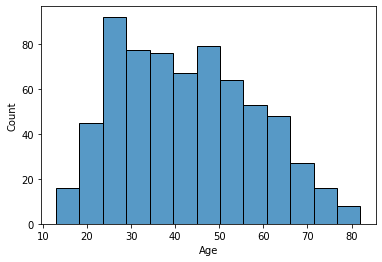

In [ ]:
sns.histplot(g['Age'])

Las edades varian entre 13 y 82, se muestra una asimetria positiva, la moda se encuentra entre la edad de 25-30 años.

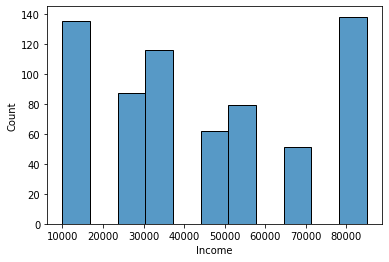

In [ ]:
sns.histplot(g['Income'])

Los ingresos en dolares australianos van desde 10000 hasta 80000, la moda se encuentra en 10000 y 80000 dolares australianos


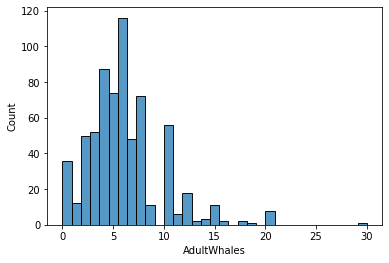

In [ ]:
sns.histplot(g['AdultWhales'])

El número de ballenas adultas se encuentran desde 0 hasta 30, evidenciando una  mayor frecuencia entre 5 y 10 ballenas adultas, vistas cerca de 120 veces.

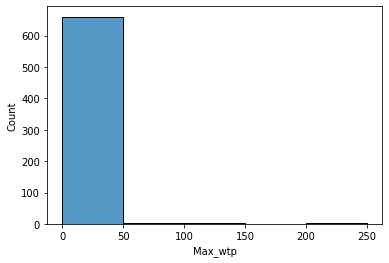

In [ ]:
sns.histplot(g['Max_wtp'], bins=5)

La mayoria de personas su máxima disposición a pagar es baja.



***Categóricas***

In [ ]:
Country = g['Country'].value_counts()
Country

Australia          479
UK                  69
Germany             24
New Zealand         18
The Netherlands     15
USA                 13
Ireland             13
Sweden               6
France               5
Italy                5
Switzerland          5
Denmark              3
Spain                2
Canada               2
Singapore            2
Israel               1
Kenya                1
Czech Republic       1
China                1
Norway               1
Belgium              1
South Africa         1
Name: Country, dtype: int64

In [ ]:
Country.index

Index(['Australia', 'UK', 'Germany', 'New Zealand', 'The Netherlands', 'USA',
       'Ireland', 'Sweden', 'France', 'Italy', 'Switzerland', 'Denmark',
       'Spain', 'Canada', 'Singapore', 'Israel', 'Kenya', 'Czech Republic',
       'China', 'Norway', 'Belgium', 'South Africa'],
      dtype='object')

In [ ]:
Country.values

array([479,  69,  24,  18,  15,  13,  13,   6,   5,   5,   5,   3,   2,
         2,   2,   1,   1,   1,   1,   1,   1,   1])

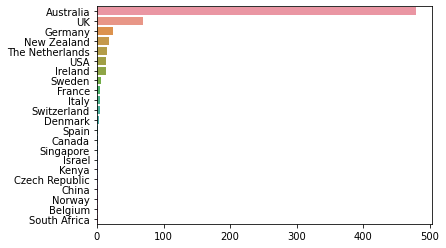

In [ ]:
sns.barplot(x=Country.values, y=Country.index)

De acuerdo con la gráfica, la mayoria de los datos corresponden a australianos con más de 450 personas, le sigue de UK y alemanes.

In [ ]:
Gender = g['Gender'].value_counts()
Gender

Female    416
Male      252
Name: Gender, dtype: int64

In [ ]:
Gender.index

Index(['Female', 'Male'], dtype='object')

In [ ]:
Gender.values

array([416, 252])

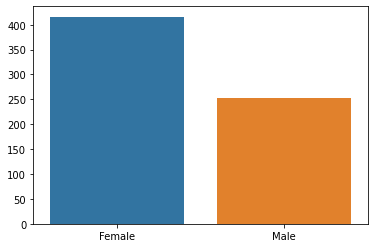

In [ ]:
sns.barplot(x=Gender.index, y=Gender.values)

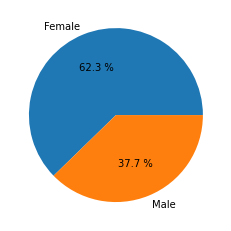

In [ ]:
plt.pie(Gender.values, labels=Gender.index, autopct="%0.1f %%")
plt.show()

De acuerdo con los datos la mayoría son mujeres, es decir el 62.3% y los hombres son un 37.7%

In [ ]:
Education = g['Education'].value_counts()
Education

Degree                      164
Completed year 12            99
Completed year 10            95
Diploma                      85
Post-graduate degree         83
Trade certificate            73
Some secondary schooling     52
Primary only                 16
Other - Specify               1
Name: Education, dtype: int64

In [ ]:
Education.index

Index(['Degree', 'Completed year 12', 'Completed year 10', 'Diploma',
       'Post-graduate degree', 'Trade certificate', 'Some secondary schooling',
       'Primary only', 'Other - Specify'],
      dtype='object')

In [ ]:
Education.values

array([164,  99,  95,  85,  83,  73,  52,  16,   1])

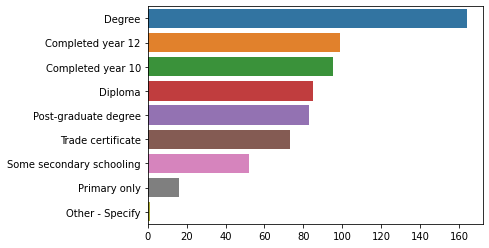

In [ ]:
sns.barplot(x=Education.values, y=Education.index)

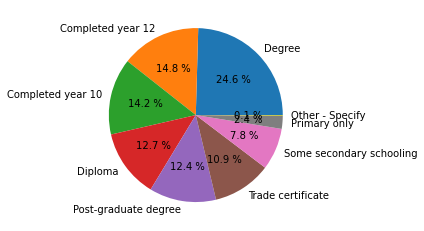

In [ ]:
plt.pie(Education.values, labels=Education.index, autopct="%0.1f %%")
plt.show()

La mayoria de la población tiene una carrera universitaria (correspondiente a un 24.6%), y la minoría de población tiene otro tipo de educación que no están especificados (correspondiente a un 0.1%).

In [ ]:
Income_AUD = g['Income_AUD'].value_counts()
Income_AUD

More than $70,000    138
Less than $20,000    135
$30,001 - $40,000    116
$20,001 - $30,000     87
$50,001 - $60,000     79
$40,001 - $50,000     62
$60,001 - $70,000     51
Name: Income_AUD, dtype: int64

In [ ]:
Income_AUD. index

Index(['More than $70,000', 'Less than $20,000', '$30,001 - $40,000',
       '$20,001 - $30,000', '$50,001 - $60,000', '$40,001 - $50,000',
       '$60,001 - $70,000'],
      dtype='object')

In [ ]:
Income_AUD. values

array([138, 135, 116,  87,  79,  62,  51])

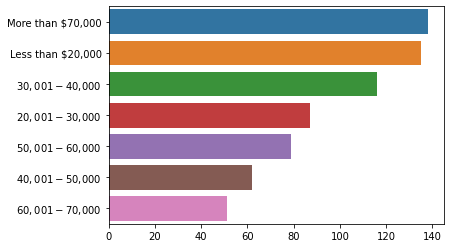

In [ ]:
sns.barplot(x=Income_AUD.values, y=Income_AUD.index)

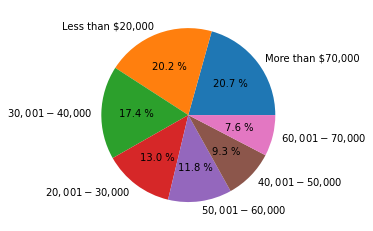

In [ ]:
plt.pie(Income_AUD.values, labels=Income_AUD.index, autopct="%0.1f %%")
plt.show()

La mayoria de la población tiene un ingreso de más de 70 000, correspondiente al 20.7%

In [ ]:
YoungWhales = g['YoungWhales'].value_counts()
YoungWhales 

Yes    495
No     173
Name: YoungWhales, dtype: int64

In [ ]:
YoungWhales.index

Index(['Yes', 'No'], dtype='object')

In [ ]:
YoungWhales.values

array([495, 173])

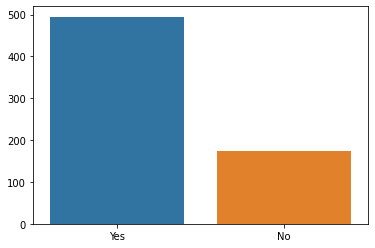

In [ ]:
sns.barplot(x=YoungWhales.index, y=YoungWhales.values)

La mayoria de personas, si vieron las ballenas jóvenes 

In [ ]:
wtp = g['wtp'].value_counts()
wtp

Less    268
More    257
Same    143
Name: wtp, dtype: int64

In [ ]:
wtp.index

Index(['Less', 'More', 'Same'], dtype='object')

In [ ]:
wtp.values

array([268, 257, 143])

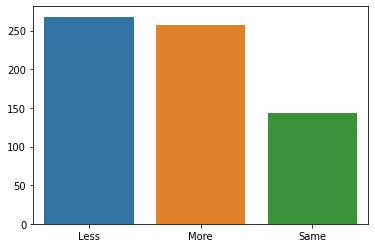

In [ ]:
sns.barplot(x=wtp.index, y=wtp.values)

La mayoria de las personas no estan dispuestas a pagar por la conservación de las ballenas.

In [ ]:
PayConserve = g['PayConserve'].value_counts()
PayConserve 

1    447
0    221
Name: PayConserve, dtype: int64

In [ ]:
PayConserve.index

Int64Index([1, 0], dtype='int64')

In [ ]:
PayConserve.values

array([447, 221])

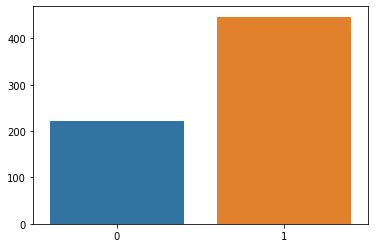

In [ ]:
sns.barplot(x=PayConserve.index, y=PayConserve.values)

La mayoria de las personas si estan dispuestas a pagar 2 dólares cada semana por 10 años, para conservar el espacio de avistamiento de ballenas.

### Visualización bivariada

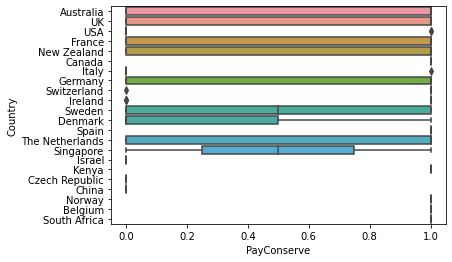

In [ ]:
sns.boxplot(data=g, x='PayConserve', y='Country')

* En países como Australia, Reino Unido, Francia y Nueva Zelanda se tiene una disposición a pagar uniformemente de 0 a 1, es decir se evidencia que la población está unida en el pago por conservar
* Existen datos atípicos en 4 paises
* Se puede afirmar que las naciones que generan mayor contaminación, sus ciudadanos muestran poco compromiso con el cuidado de la conservación de los ecosistemas las ballenas como China y Estados Unidos

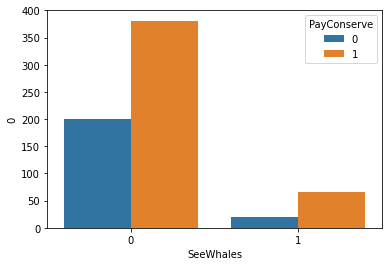

In [ ]:
m = pd.crosstab(g['SeeWhales'], g['PayConserve']).stack().reset_index()
sns.barplot(data = m, x='SeeWhales', y=0, hue='PayConserve')

* En la gráfica se evidencia que tanto las personas que han visto ballenas como las que no, la mayoría están dispuestos a pagar por la conservación del ecosistema.
* Por otra parte, las personas que están dispuestas a pagar por la conservación y han visto ballenas, son más del doble de los que no están dispuestos a pagar.
* Adicionalmente, las personas que están dispuestas a pagar por la conservación y NO han visto ballenas, son menos del doble de los que no están dispuestos a pagar.

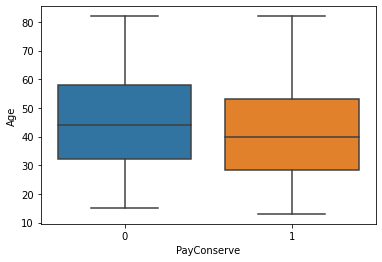

In [ ]:
sns.boxplot(data=g, x='PayConserve', y='Age')

Se observa una asimetría positiva entre quienes no pagarían por conservar las ballenas, es decir se evidencia que la media es mayor que la mediana, en el caso de quienes pagarían por la conservación tiene un mínimo de 13 y un máximo cercano a 81, con esto se puede suponer que las generaciones actuales le están dando mayor relevancia a la preservación de las especies.

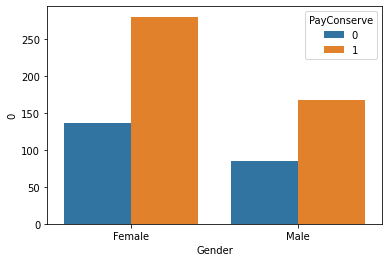

In [ ]:
m = pd.crosstab(g['Gender'], g['PayConserve']).stack().reset_index()
sns.barplot(data = m, x='Gender', y=0, hue='PayConserve')

* En los dos géneros la mayoría están dispuestos pagar por la conservación.
* En el caso de los hombres, la disposición pagar es el doble a comparación de los que no.
* En el caso de las mujeres, la disposción a pagar  comparación de os e no, es un poco más del doble.

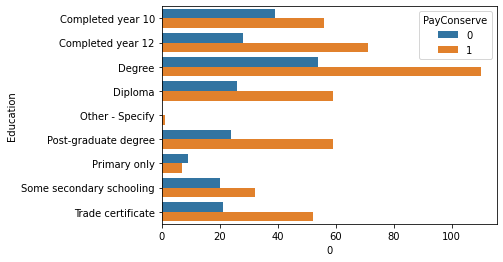

In [ ]:
m = pd.crosstab(g['Education'], g['PayConserve']).stack().reset_index()
sns.barplot(data = m, y='Education', x=0, hue='PayConserve')

De acuerdo con la gráfica, de las 9 categorías de educación sólo en una (correspondiente a las personas que solo tienen primaria)
 la mayoría no están dispuestas a pagar por la conservación del ecosistema de avistamiento de ballenas.

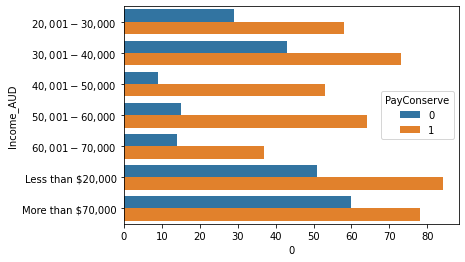

In [ ]:
m = pd.crosstab(g['Income_AUD'], g['PayConserve']).stack().reset_index()
sns.barplot(data = m, y='Income_AUD', x=0, hue='PayConserve')

La mayoría de las personas están dispuesta a pagar por la conservación del ecosistema de avistamiento de ballenas. Hay que tener en cuenta que estos datos categorizados son rangos y existe la posibilidad de un sesgo por datos que no se encuentren dentro de estos rangos.

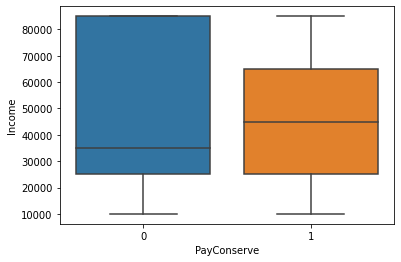

In [ ]:
sns.boxplot(data=g, x='PayConserve', y='Income')

Las personas que tienen mayores ingresos tienen menor disposición a pagar en pro de la conservación de los lugares para avistamiento de las ballenas, visto de otra forma se quiere pagar solo lo necesario por esto, además las personas con ingresos por encima de los 30000 dólares australianos empiezan a pensar en aportar a esta actividad.

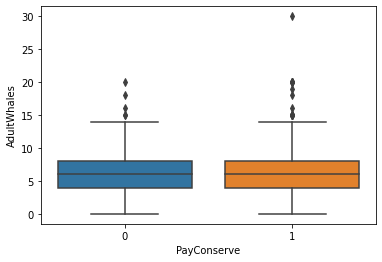

In [ ]:
sns.boxplot(data=g, x='PayConserve', y='AdultWhales')

Las personas que han observado las ballenas se encuentran segmentados en dos grupos, en el que si aportaría por visualizar a las ballenas se notan datos atípicos, el más relevante es quien ha visto 30 ballenas adultas.

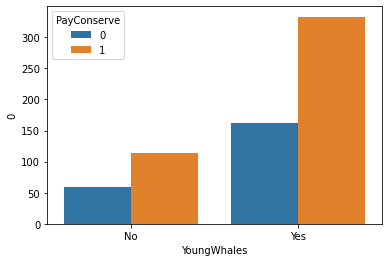

In [ ]:
m = pd.crosstab(g['YoungWhales'], g['PayConserve']).stack().reset_index()
sns.barplot(data = m, x='YoungWhales', y=0, hue='PayConserve')

* Las personas que han visto como las que no han visto ballenas jóvenes, la mayoría están dispuestas a pagar por la consevación del espacio.
* En el caso de los que si han visto ballenas jóvenes, más de la mitad estan dispuestos a paga por la conservaión del entorno.

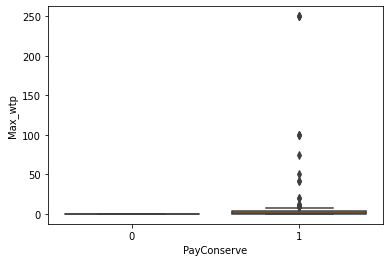

In [ ]:
sns.boxplot(data=g, x='PayConserve', y='Max_wtp')

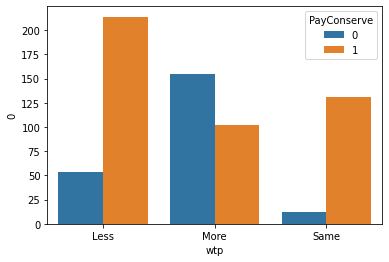

In [ ]:
m = pd.crosstab(g['wtp'], g['PayConserve']).stack().reset_index()
sns.barplot(data = m, x='wtp', y=0, hue='PayConserve')

* Se observa que en la categoria *Less* y *Same*, que la mayoría estan dispuetos a pagar por la conservación.
* Se encuentra en la categoría *More* una especie de paradója, pues corresponde a las personas que estan más dispuestas a pagar por la conservación, sin embargo al comparar con el *PayConseve* que correponde a la disposición a pagar pero con valores definidos (2 dólares semanales por 10 años), la mayoría no estan dispuesto a pagar. Esto se puede deber a que no tenian la información completa.

# Cambio de valores

In [ ]:
g.Gender = g.Gender.replace({'Female':1, 'Male':0})

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
g.YoungWhales = g.YoungWhales.replace({'Yes':1, 'No':0})

In [ ]:
g

,Country,SeeWhales,Age,Gender,Education,Income_AUD,Income,AdultWhales,YoungWhales,Max_wtp,wtp,PayConserve
0,Australia,1,31.0,1,Diploma,"$60,001 - $70,000",65000.5,2,1,0.0,Less,1
1,UK,0,22.0,1,Degree,"Less than $20,000",10000.0,6,0,0.0,More,0
2,USA,0,46.0,1,Degree,"More than $70,000",85000.5,7,0,0.0,More,0
3,France,0,37.0,1,Diploma,"$20,001 - $30,000",25000.5,4,1,0.0,More,1
5,Australia,0,65.0,0,Post-graduate degree,"$40,001 - $50,000",45000.5,3,1,1.0,Same,1
...,...,...,...,...,...,...,...,...,...,...,...,...
696,Australia,0,56.0,1,Completed year 10,"Less than $20,000",10000.0,0,1,1.0,Same,1
697,Australia,0,38.0,1,Completed year 10,"$30,001 - $40,000",35000.5,6,1,2.0,Same,1
698,Australia,0,24.0,1,Diploma,"$20,001 - $30,000",25000.5,6,0,2.0,Less,1
699,Australia,0,50.0,0,Post-graduate degree,"$30,001 - $40,000",35000.5,2,1,5.0,Same,1


In [ ]:
g['Education_N'] = g['Education']
g

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Country,SeeWhales,Age,Gender,Education,Income_AUD,Income,AdultWhales,YoungWhales,Max_wtp,wtp,PayConserve,Education_N
0,Australia,1,31.0,1,Diploma,"$60,001 - $70,000",65000.5,2,1,0.0,Less,1,Diploma
1,UK,0,22.0,1,Degree,"Less than $20,000",10000.0,6,0,0.0,More,0,Degree
2,USA,0,46.0,1,Degree,"More than $70,000",85000.5,7,0,0.0,More,0,Degree
3,France,0,37.0,1,Diploma,"$20,001 - $30,000",25000.5,4,1,0.0,More,1,Diploma
5,Australia,0,65.0,0,Post-graduate degree,"$40,001 - $50,000",45000.5,3,1,1.0,Same,1,Post-graduate degree
...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,Australia,0,56.0,1,Completed year 10,"Less than $20,000",10000.0,0,1,1.0,Same,1,Completed year 10
697,Australia,0,38.0,1,Completed year 10,"$30,001 - $40,000",35000.5,6,1,2.0,Same,1,Completed year 10
698,Australia,0,24.0,1,Diploma,"$20,001 - $30,000",25000.5,6,0,2.0,Less,1,Diploma
699,Australia,0,50.0,0,Post-graduate degree,"$30,001 - $40,000",35000.5,2,1,5.0,Same,1,Post-graduate degree


In [ ]:
Education_N = g['Education_N'].value_counts()
Education_N

Degree                      164
Completed year 12            99
Completed year 10            95
Diploma                      85
Post-graduate degree         83
Trade certificate            73
Some secondary schooling     52
Primary only                 16
Other - Specify               1
Name: Education_N, dtype: int64

In [ ]:
g.Education_N = g.Education_N.replace({'Other - Specify':0, 
                                           'Primary only':1, 
                                           'Some secondary schooling':2, 
                                           'Completed year 10':3,
                                           'Completed year 12':4,
                                           'Diploma':5,
                                           'Trade certificate':6,
                                           'Degree':7,
                                           'Post-graduate degree':8})

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
g

,Country,SeeWhales,Age,Gender,Education,Income_AUD,Income,AdultWhales,YoungWhales,Max_wtp,wtp,PayConserve,Education_N
0,Australia,1,31.0,1,Diploma,"$60,001 - $70,000",65000.5,2,1,0.0,Less,1,5
1,UK,0,22.0,1,Degree,"Less than $20,000",10000.0,6,0,0.0,More,0,7
2,USA,0,46.0,1,Degree,"More than $70,000",85000.5,7,0,0.0,More,0,7
3,France,0,37.0,1,Diploma,"$20,001 - $30,000",25000.5,4,1,0.0,More,1,5
5,Australia,0,65.0,0,Post-graduate degree,"$40,001 - $50,000",45000.5,3,1,1.0,Same,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,Australia,0,56.0,1,Completed year 10,"Less than $20,000",10000.0,0,1,1.0,Same,1,3
697,Australia,0,38.0,1,Completed year 10,"$30,001 - $40,000",35000.5,6,1,2.0,Same,1,3
698,Australia,0,24.0,1,Diploma,"$20,001 - $30,000",25000.5,6,0,2.0,Less,1,5
699,Australia,0,50.0,0,Post-graduate degree,"$30,001 - $40,000",35000.5,2,1,5.0,Same,1,8


In [ ]:
Education_N = g['Education_N'].value_counts()
Education_N

7    164
4     99
3     95
5     85
8     83
6     73
2     52
1     16
0      1
Name: Education_N, dtype: int64

La variable de la nueva colummna llamada *Education_N*, está pensada como las escalas de medición, entre mayor título obtenga mayor es la puntuación. 

# Análisis de correlación

In [ ]:
g.corr(method='pearson')

,SeeWhales,Age,Gender,Income,AdultWhales,YoungWhales,Max_wtp,PayConserve,Education_N
SeeWhales,1.000000,0.132323,0.004086,-0.016512,0.059876,0.074203,0.072767,0.080293,-0.048032
Age,0.132323,1.000000,-0.105724,-0.099886,0.090113,0.031347,-0.051015,-0.101716,-0.255627
Gender,0.004086,-0.105724,1.000000,-0.103052,-0.070860,-0.058259,-0.019567,0.010691,-0.098282
Income,-0.016512,-0.099886,-0.103052,1.000000,0.059070,0.117574,0.051494,-0.016063,0.305992
AdultWhales,0.059876,0.090113,-0.070860,0.059070,1.000000,-0.005848,0.243281,0.040078,0.015848
YoungWhales,0.074203,0.031347,-0.058259,0.117574,-0.005848,1.000000,0.047691,0.012819,0.017451
Max_wtp,0.072767,-0.051015,-0.019567,0.051494,0.243281,0.047691,1.000000,0.125401,0.044611
PayConserve,0.080293,-0.101716,0.010691,-0.016063,0.040078,0.012819,0.125401,1.000000,0.073109
Education_N,-0.048032,-0.255627,-0.098282,0.305992,0.015848,0.017451,0.044611,0.073109,1.000000


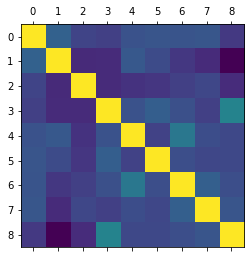

In [ ]:
plt.matshow(g.corr(method='pearson'))

* Es una matriz simétrica
* Correlaciones positivas con respecto a *PayConserve*: SeeWhales, Gender,	AdultWhales, YoungWhales, Max_wtp, PayConserve y Education_N
* Correlaciones negativas con respeco a *PayConserve*: Age and Income

In [ ]:
g.corr(method='spearman')

,SeeWhales,Age,Gender,Income,AdultWhales,YoungWhales,Max_wtp,PayConserve,Education_N
SeeWhales,1.000000,0.132654,0.004086,-0.013938,0.054898,0.074203,-0.007373,0.080293,-0.046062
Age,0.132654,1.000000,-0.108226,-0.057471,0.064349,0.040857,-0.191821,-0.097485,-0.237542
Gender,0.004086,-0.108226,1.000000,-0.104436,-0.039980,-0.058259,0.001200,0.010691,-0.098877
Income,-0.013938,-0.057471,-0.104436,1.000000,0.058659,0.121695,0.106140,0.003990,0.305926
AdultWhales,0.054898,0.064349,-0.039980,0.058659,1.000000,-0.012534,0.040770,0.015463,-0.000819
YoungWhales,0.074203,0.040857,-0.058259,0.121695,-0.012534,1.000000,0.047573,0.012819,0.025650
Max_wtp,-0.007373,-0.191821,0.001200,0.106140,0.040770,0.047573,1.000000,0.570777,0.122620
PayConserve,0.080293,-0.097485,0.010691,0.003990,0.015463,0.012819,0.570777,1.000000,0.069171
Education_N,-0.046062,-0.237542,-0.098877,0.305926,-0.000819,0.025650,0.122620,0.069171,1.000000


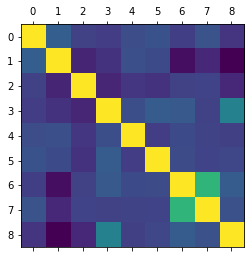

In [ ]:
plt.matshow(g.corr(method='spearman'))

* Es una matriz simétrica
Correlaciones positivas con respecto a *PayConserve*: SeeWhales, Gender, Income, AdultWhales, YoungWhales, Max_wtp, PayConserve y Education_N
* Las correlaciones más bajas con respecto a la variable *PayConserve* son Age con -0.097485 y Income con 0.003990
* Correlaciones negativas con respeco a *PayConserve*: Age

# Modelamiento

In [ ]:
y = g['PayConserve']
X = g[['SeeWhales','Age','Gender','Income','Education_N']]
X = sm.add_constant(X)
model = sm.OLS(y,X)
reg = model.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:            PayConserve   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     3.202
Date:                Sat, 29 Oct 2022   Prob (F-statistic):            0.00727
Time:                        12:21:52   Log-Likelihood:                -436.25
No. Observations:                 668   AIC:                             884.5
Df Residuals:                     662   BIC:                             911.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7399      0.092      8.016      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


* Variables significativas: *SeeWhales* y *Age* porque el P-valor está por debajo de 0.05 (nivel de significancia). También, porque dentro de sus intervalos de confianza, no se encuentra la hipótesis nula, es decir, el número 0
* Variables NO significativas: *Income*, *Gender*, *Education_N*
* SeeWhales: Si una persona ha visto ballenas, su probabilidad de disposición a pagar aumenta en 0.1351.
* Age: A mayor edad, las personas no estan dispuestas a pagar, pues su probabilidad disminuye en 0.0031
* Income: Por una unidad de más en el ingreso, la probabilidad de pagar por la conservación del ecosistema disminuye
* Gender: al ser mujer, la probabilidad de pagar por la conservación del ecosistema aumenta
* Education_N: a mayor grado de educación, la probabilidad de pagar por la conservación del ecosistema aumenta

# Conclusión general

¿Cuál es el efecto de haber visto ballenas en la probabilidad de pagar por conservar 2 dólares cada semana durante años?
> El efecto es positivo, es decir si una persona ha visto ballenas, su probabilidad de disposición a pagar aumenta. Esto se puede deber a que quieren repetir la experiencia, compartirla y/o que exista la posibilidad de avistamiento de ballenas para las futuras generaciones como sus hijos.